Cifar-10 Project 2 79

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Data uploading  

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Data Prerposessing

In [3]:
# Normalization
x_train=x_train/.255

x_test=x_test/.255

#One-hot encoding
y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [4]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [17]:
x_train.shape

(45000, 32, 32, 3)

Model 정의(CNN 기반)

In [9]:
def get_model():
    
    model=Sequential([
        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Flatten(),
        
        Dense(units=128,activation='relu'),
        Dropout(0.3),
        Dense(units=10,activation='softmax') 
    ])

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'],)

    return model

In [ ]:
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [10]:
model_checkpoint_best_path=r'.\checkpoint_best_2'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')

early_stopping=EarlyStopping(monitor='val_acc',patience=20,min_delta=1e-4)

In [ ]:
model.summary()

In [ ]:
tf.config.experimental.list_physical_devices("GPU")

In [11]:
model=get_model()
history=model.fit(x_train,
        y_train,
        epochs=200,
        batch_size=32,
        validation_data=(x_val,y_val),
        verbose=1,
        callbacks=[model_checkpoint_best,early_stopping])

Epoch 1/200
1407/1407 [==============================] - 15s 10ms/step - loss: 1.7859 - acc: 0.3294 - val_loss: 1.4439 - val_acc: 0.4654
Epoch 2/200
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4046 - acc: 0.4867 - val_loss: 1.2590 - val_acc: 0.5398
Epoch 3/200
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2607 - acc: 0.5487 - val_loss: 1.1035 - val_acc: 0.5980
Epoch 4/200
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1750 - acc: 0.5801 - val_loss: 1.0644 - val_acc: 0.6182
Epoch 5/200
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1289 - acc: 0.6000 - val_loss: 1.0265 - val_acc: 0.6234
Epoch 6/200
1407/1407 [==============================] - 13s 10ms/step - loss: 1.0804 - acc: 0.6180 - val_loss: 0.9677 - val_acc: 0.6562
Epoch 7/200
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0465 - acc: 0.6316 - val_loss: 0.9711 - val_acc: 0.6556
Epoch 8/200
1407/1407 [=======================

Model 학습

In [13]:
model=get_model()
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(x=x_val,y=y_val,verbose=1)

157/157 [==============================] - 1s 5ms/step - loss: 0.6101 - acc: 0.7912


Train 및 Validation acc 시각화

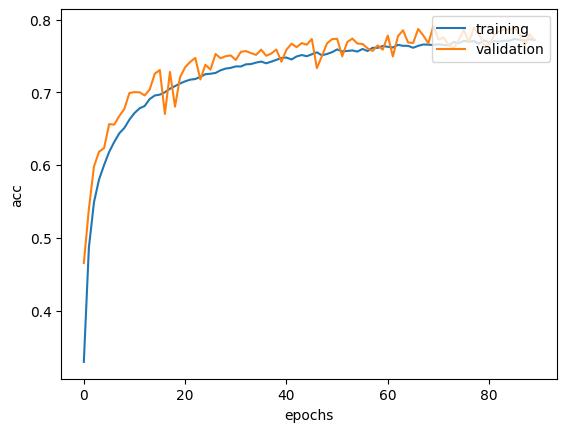

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

Test dataset 검증

In [14]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.6233 - acc: 0.7882
